In [4]:
import pandas as pd
from ydata_profiling import ProfileReport
import ipywidgets

In [5]:
# importamos wget y las librerías que nos faltan
from wget import download
from os import path, listdir


# y una en CSV
if not path.exists("catalogo_streaming_argentina_2024.xlsx"):
  download("https://ignaciorlando.github.io/datasets/data-science/catalogo_streaming_argentina_2024.xlsx")
else:
  print("No vamos a bajar el archivo de casas porque ya existe!")

# chequeamos si los archivos están en el directorio donde estamos parados
lista_archivos = listdir("./")
print(f"El contenido de la carpeta es: {lista_archivos}")

No vamos a bajar el archivo de casas porque ya existe!
El contenido de la carpeta es: ['.git', '.idea', 'catalogo_streaming_argentina_2024 (1).xlsx', 'catalogo_streaming_argentina_2024.xlsx', 'example1.ipynb', 'example2.ipynb', 'example3.ipynb', 'netflix_titles.csv', 'ObesityDataSet_raw_and_data_sinthetic.csv', 'reporte_netflix.html', 'reporte_obesity.html', 'reporte_series_argentinas.html', 'venv']


In [6]:
# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_excel("catalogo_streaming_argentina_2024.xlsx")
profileReport = ProfileReport(raw_dataset, title="Profiling Report")
profileReport.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profileReport.to_file(output_file="reporte_series_argentinas.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19817 entries, 0 to 19816
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           19817 non-null  object 
 1   platform        19817 non-null  object 
 2   type            19817 non-null  object 
 3   imdbVotes       17854 non-null  float64
 4   imdbScore       17927 non-null  float64
 5   tmdbPopularity  19538 non-null  float64
 6   tmdbScore       18954 non-null  float64
 7   runtime         19817 non-null  int64  
 8   genres          19665 non-null  object 
 9   director        14626 non-null  object 
 10  year_range      19817 non-null  object 
 11  url             19817 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


HAGAMOS UN ANALISIS DE LAS CORRELACIONES!

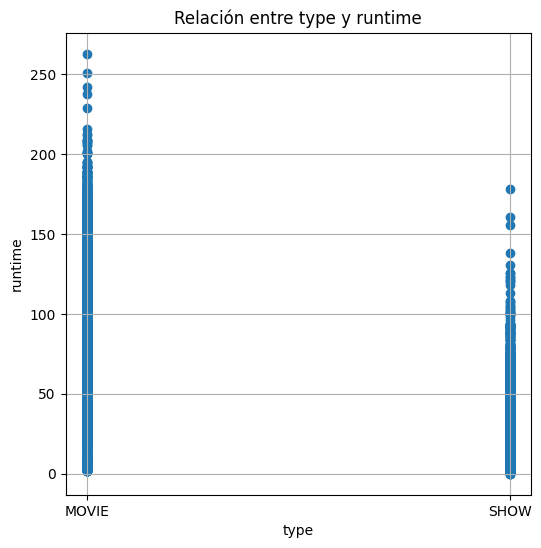

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
variable_1 = 'runtime'
variable_2 = 'type'

plt.figure(figsize=(6, 6))  # con esta línea podemos ajustar el tamaño de la gráfica
plt.scatter(raw_dataset[variable_2], raw_dataset[variable_1])
plt.xlabel(variable_2)
plt.ylabel(variable_1)
plt.title("Relación entre {} y {}".format(variable_2, variable_1))

datos_columna1 = raw_dataset[variable_1]
datos_columna2 = raw_dataset[variable_2]




plt.grid(True)
plt.show()

Podemos ver que probablemente el tipo ya sea pelicula o serie teien que ver con su duracion en pantalla.
NO existen otras correlaciones relevantes. Gracias.